In [2]:
import IO
import numpy as np
import matplotlib.pyplot as plt
DOWN, UP=0,1

2.7.13 |Anaconda custom (64-bit)| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [3]:
Chi={}
BKChi={}
rGammaG={}
iGammaG={}

In [4]:
d3=IO.LoadBigDict("./square/Beta1.0_Order3_Tau32_L8_Weight.hkl")
d4=IO.LoadBigDict("./square/Beta1.0_Order4_Tau32_L8_Weight.hkl")
d5=IO.LoadBigDict("./square/Beta1.0_Order5_Tau32_L8_Weight.hkl")

In [5]:
rGammaG[3]=np.array(d3["GammaG"]["SmoothT"])
Chi[3]=np.array(d3["Chi"]["SmoothT"])[0,0,0,0,:,:]

rGammaG[4]=np.array(d4["GammaG"]["SmoothT"])
Chi[4]=np.array(d4["Chi"]["SmoothT"])[0,0,0,0,:,:]

rGammaG[5]=np.array(d5["GammaG"]["SmoothT"])
Chi[5]=np.array(d5["Chi"]["SmoothT"])[0,0,0,0,:,:]


In [6]:
del d3,d4,d5

In [7]:
for i in [3,4,5]:
    BKChi[i]=0.5*(rGammaG[i][DOWN,:,:,:].diagonal(axis1=1,axis2=2)-rGammaG[i][UP,:,:,:].diagonal(axis1=1,axis2=2))

In [8]:
di1=IO.LoadBigDict("./square/Beta1.0_Order1_Tau32_L8_Weight.hkl")
di2=IO.LoadBigDict("./square/Beta1.0_Order2_Tau32_L8_Weight.hkl")
di4=IO.LoadBigDict("./square/Beta1.0_Order4_Tau32_L8_Irreducible_Weight.hkl")

In [9]:
iGammaG[1]=np.array(di1["GammaG"]["SmoothT"])
BKChi[1]=np.array(di1["BKChi"]["SmoothT"])[0,0,0,0,:,:]
Chi[1]=np.array(di1["Chi"]["SmoothT"])[0,0,0,0,:,:]

iGammaG[2]=np.array(di2["GammaG"]["SmoothT"])
BKChi[2]=np.array(di2["BKChi"]["SmoothT"])[0,0,0,0,:,:]
Chi[2]=np.array(di2["Chi"]["SmoothT"])[0,0,0,0,:,:]

iGammaG[4]=np.array(di4["GammaG"]["SmoothT"])
BKChi[4]=np.array(di4["BKChi"]["SmoothT"])[0,0,0,0,:,:]
Chi[4]=np.array(di4["Chi"]["SmoothT"])[0,0,0,0,:,:]


In [10]:
for order in range(1, 6):
    print np.average(np.sum(Chi[order],axis=0))

(0.10333775683+8.86443696224e-16j)
(0.104672301075-1.78814247501e-07j)
(0.100156320282-6.34836942297e-06j)
(0.0959835902537+1.7527238693e-05j)
(0.0958106839764-3.22060672264e-05j)


In [11]:
del di1,di2,di4

In [12]:
Beta=1.0
MaxTauBin=32
TGrid=np.array(range(MaxTauBin))*Beta/MaxTauBin

# imaginary-time-dependent uniform susceptibility

In [13]:
for order in BKChi.keys():
    BKChi[order].real=BKChi[order].real+BKChi[order].imag
    BKChi[order].imag=0.0
#    BKChi[order]=(BKChi[order][:,:]+BKChi[order][:,::-1])/2.0
    Chi[order].real=Chi[order].real+Chi[order].imag
    Chi[order].imag=0.0
#    Chi[order]=(Chi[order][:,:]+Chi[order][:,::-1])/2.0

In [21]:
f, ax1=plt.subplots(1,1,  sharey=True)
color={1:"g",2:"y",3:"b",4:"r",5:"k"}
for order in BKChi.keys():
    if order != 5:
        ax1.plot(TGrid, np.sum(BKChi[order], axis=0), c=color[order], label="CDMC, Order {0}".format(order))

#for order in Chi.keys():
#    ax2.plot(TGrid, np.sum(Chi[order], axis=0), c=color[order], label="DMC, Order {0}".format(order))

y=[0.0937,]*MaxTauBin
ax1.plot(TGrid, y, 'k--', label="Unbiased MC")
#ax2.plot(TGrid, y, 'k--', label="Unbiased MC")
    
ax1.legend()
#ax2.legend()
#plt.show()
plt.savefig("CDMC_conservation_2.pdf")

In [25]:
f, ax2=plt.subplots(1,1,  sharey=True)
color={1:"g",2:"y",3:"b",4:"r",5:"k"}
#for order in BKChi.keys():
#    ax1.plot(TGrid, np.sum(BKChi[order], axis=0), c=color[order], label="CDMC, Order {0}".format(order))

for order in Chi.keys():
    if order!=5:
        ax2.plot(TGrid, np.sum(Chi[order], axis=0), c=color[order], label="DiagMC, Order {0}".format(order))

y=[0.0937,]*MaxTauBin
#ax1.plot(TGrid, y, 'k--', label="Unbiased MC")
ax2.plot(TGrid, y, 'k--', label="Unbiased MC")
    
#ax1.legend()
ax2.legend()
#plt.show()
plt.savefig("DiagMC_conservation_2.pdf")

# Check for covergence

In [13]:
BKChiAvg=[]
for order in BKChi.keys():
    chit=np.sum(BKChi[order],axis=0)
    avg=np.average(chit)
    err=np.max(chit)-np.min(chit)
    BKChiAvg.append([order, avg.real, err.real])
BKChiAvg=np.array(BKChiAvg)

ChiAvg=[]
ChiMax=[]
ChiMin=[]
for order in Chi.keys():
    chit=np.sum(Chi[order],axis=0)
    avg=np.average(chit)
    err=np.max(chit)-np.min(chit)
    ChiAvg.append([order, avg, 0])
    ChiMax.append([order, np.max(chit).real, 0])
    ChiMin.append([order, np.min(chit).real, 0])
ChiAvg=np.array(ChiAvg)
ChiMax=np.array(ChiMax)
ChiMin=np.array(ChiMin)

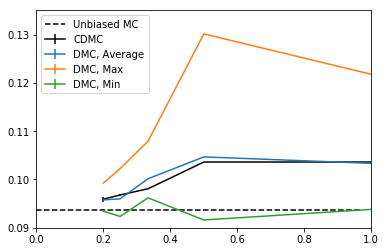

In [14]:
plt.figure()
#plt.plot(1.0/BKChiAvg[:,0], BKChiAvg[:,1])
plt.errorbar(1.0/BKChiAvg[:,0], BKChiAvg[:,1], yerr=BKChiAvg[:,2], c="k", label="CDMC")
plt.errorbar(1.0/ChiAvg[:,0], ChiAvg[:,1], yerr=ChiAvg[:,2], label="DMC, Average")
plt.errorbar(1.0/ChiMax[:,0], ChiMax[:,1], yerr=ChiMax[:,2], label="DMC, Max")
plt.errorbar(1.0/ChiMin[:,0], ChiMin[:,1], yerr=ChiMin[:,2], label="DMC, Min")
y=[0.0937,]*MaxTauBin
plt.plot(TGrid, y, 'k--', label="Unbiased MC")
plt.ylim([0.09,0.135])
plt.xlim([0,1])
plt.legend()
plt.show()

# The Shape of GammaG

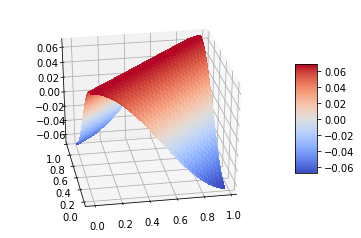

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

X, Y = np.meshgrid(TGrid, TGrid)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
surf = ax.plot_surface(X, Y, np.sum(iGammaG[4][0,:,:,:],axis=0).real, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, -100)
plt.show()

#f, (ax1,ax2)=plt.subplots(1,2,sharey=True)
#ax1.imshow(rGammaG[5][0,0,:,:].real)
#f.colorbar(im, ax=ax1)
#ax2.imshow(rGammaG[5][0,0,:,:].imag)
#f.colorbar(im, ax=ax2)
#plt.show()

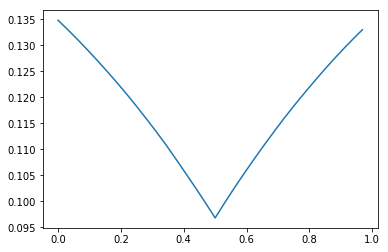

In [18]:
Order=4
plt.figure()
plt.plot(TGrid, 0.5*np.sum(rGammaG[4][DOWN,:,16,:]-rGammaG[4][UP,:,16,:],axis=0).real)
#plt.plot(TGrid, 0.5*np.sum(rGammaG[4][DOWN,:,16,:]-rGammaG[4][UP,:,16,:],axis=0).real)

#plt.xlim([0.4,0.6])
#plt.ylim([0.095,0.105])
plt.show()

In [166]:
np.sum(BKChi[4], axis=0)

array([ 0.09691592+0.j,  0.09689821+0.j,  0.09690480+0.j,  0.09688369+0.j,
        0.09685229+0.j,  0.09681536+0.j,  0.09675525+0.j,  0.09671859+0.j,
        0.09674901+0.j,  0.09675553+0.j,  0.09674395+0.j,  0.09675305+0.j,
        0.09677740+0.j,  0.09677147+0.j,  0.09677955+0.j,  0.09683805+0.j,
        0.09688390+0.j,  0.09687823+0.j,  0.09687711+0.j,  0.09683405+0.j,
        0.09679137+0.j,  0.09671618+0.j,  0.09670381+0.j,  0.09676344+0.j,
        0.09675246+0.j,  0.09669744+0.j,  0.09669749+0.j,  0.09670175+0.j,
        0.09670935+0.j,  0.09674316+0.j,  0.09683251+0.j,  0.09692503+0.j])

In [154]:
0.5*np.sum(rGammaG[4][DOWN,:,:,:]-rGammaG[4][UP,:,:,:],axis=0).diagonal()

array([ 0.09684449 +1.11998543e-04j,  0.09689925 +1.15846371e-04j,
        0.09689379 +1.20089260e-04j,  0.09688111 +8.85988097e-05j,
        0.09688762 +6.17965022e-05j,  0.09687839 +1.00139020e-04j,
        0.09687029 +1.28393782e-04j,  0.09687586 +7.77987869e-05j,
        0.09689233 -1.96938669e-05j,  0.09687046 -5.47889433e-05j,
        0.09688797 -7.07380747e-05j,  0.09687950 -9.62216052e-05j,
        0.09680880 -6.01744234e-05j,  0.09679451 -6.87114149e-05j,
        0.09681304 -1.16353830e-04j,  0.09681669 -1.64872810e-04j,
        0.09682854 -1.29005076e-04j,  0.09685926 -8.96659585e-05j,
        0.09685618 -9.86597140e-05j,  0.09681062 -1.23716414e-04j,
        0.09676934 -1.55875960e-04j,  0.09676612 -1.36060793e-04j,
        0.09680573 -9.96254401e-05j,  0.09686181 -5.99271056e-05j,
        0.09686944 -2.31200318e-05j,  0.09681984 +1.78450827e-05j,
        0.09675320 +3.88344068e-05j,  0.09670130 +5.86371218e-05j,
        0.09669757 +8.28430526e-05j,  0.09670919 +8.47991469e-